### Thinking about your project with one of the most famous transport networks of all: The Tube

Explore the dataset of the London Tube network published by Nicola Greco on their Github page: https://github.com/nicola/tubemaps

In [2]:
import pandas as pd

#vertices (stations)
url_V="https://raw.githubusercontent.com/nicola/tubemaps/master/datasets/london.stations.csv"
df_V=pd.read_csv(url_V)
# df_V.head()

#edges (connections between stations)
url_E="https://raw.githubusercontent.com/nicola/tubemaps/master/datasets/london.connections.csv"
df_E=pd.read_csv(url_E)
df_V.head()

,id,latitude,longitude,name,display_name,zone,total_lines,rail
0,1,51.5028,-0.2801,Acton Town,Acton<br />Town,3.0,2,0
1,2,51.5143,-0.0755,Aldgate,NaN,1.0,2,0
2,3,51.5154,-0.0726,Aldgate East,Aldgate<br />East,1.0,2,0
3,4,51.5107,-0.0130,All Saints,All<br />Saints,2.0,1,0
4,5,51.5407,-0.2997,Alperton,NaN,4.0,1,0


In [3]:
#you're familiar with dictionaries so let's stick with them for the moment...

dict_V = dict([(i,(x,y)) for i, x,y in zip(df_V.name, df_V.latitude, df_V.longitude)])
dict_names = dict([(id,i) for id,i in zip(df_V.id,df_V.name)])

dict_E = dict([((i,j), w) for i,j,w in zip(df_E.station1.map(dict_names), df_E.station2.map(dict_names), df_E.time)])

In [4]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(dict_V)
G.add_edges_from(dict_E)

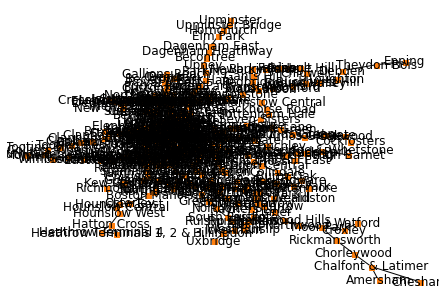

In [5]:
nx.draw(G, dict_V, 
        node_color='C1', 
        node_shape='s', 
        node_size=25, 
        with_labels=True)

### Some questions to guide your exploration...
Clearly the network is not random - can you show that?

Is it small-world? scale-free? Why would these be good/bad for such a transport network?

What properties would a good transport network have? How can you quantify them?

The actual tube map is a work of art (I know, I've tried to make one mapping the different areas of mathematics before and it was no easy task!). Consider how to make your network prettier, e.g. you might try to colour edges based on the tube line (there is a separate dataset london.lines.csv for this). You might also like to tinker with Gephi.

Find your own dataset and practice manipulating it into the form you need.

Try create your graph from a Dataframe instead of a dictionary.